In [92]:
import sys
sys.path.append("..")

from datetime import datetime
import numpy as np
import ujson as json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from lib.utils import get_samples_from_folder
from copy import deepcopy
import pandas as pd
from lib.features import WPTFeatureExtractor
from typing import Tuple
import pickle 

# from yaml import load, Loader

In [3]:
import sys
from models.metric_learning import (
    DataLoader,
    FeatureReducer,
    get_proba_per_sample,
    create_triplets_idx,
    TripletDataset,
    FeatureReducerScikit
)

In [4]:
plt.style.use("default")

In [5]:
PATH_TO_DATASET_1 = "/workspaces/project/raw/sequence_1/"
PATH_TO_DATASET_2 = "/workspaces/project/raw/sequence_2/"
PATH_MODELS = "../models/metric_learning/models_repo"

In [6]:
valid_date = datetime(2023, 1, 7, 10, 00)
dataset_per_cable = get_samples_from_folder(PATH_TO_DATASET_2, valid_date)

  0%|          | 0/4420 [00:00<?, ?it/s]

100%|██████████| 4420/4420 [01:22<00:00, 53.37it/s]


In [ ]:
x = dataset_per_cable[f"c1"][["y", "z"]].to_numpy()
dates = dataset_per_cable[f"c1"].index.to_numpy()
y = dataset_per_cable[f"c1"][["tension"]].to_numpy().flatten()
time = np.arange(len(dates))

del dataset_per_cable

In [14]:
fe = WPTFeatureExtractor(
    level = 6,
    family = "db16",
    reduction = "energy",
    normalize = True
)

x_wpt = fe.transform(x)

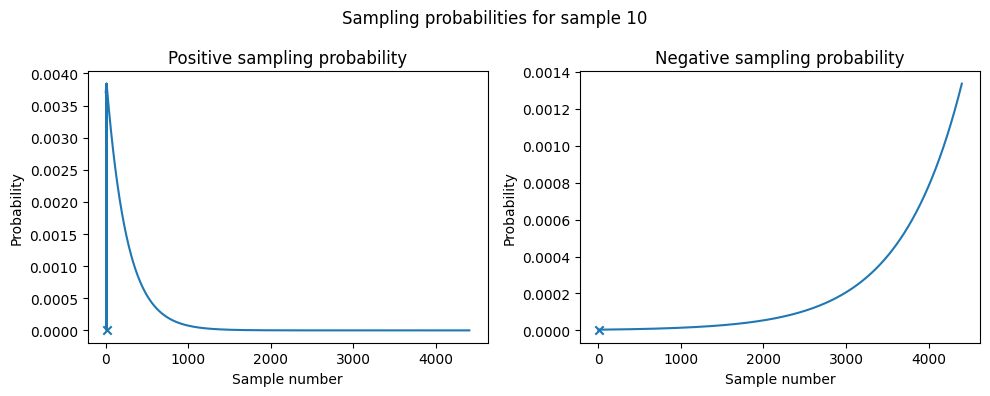

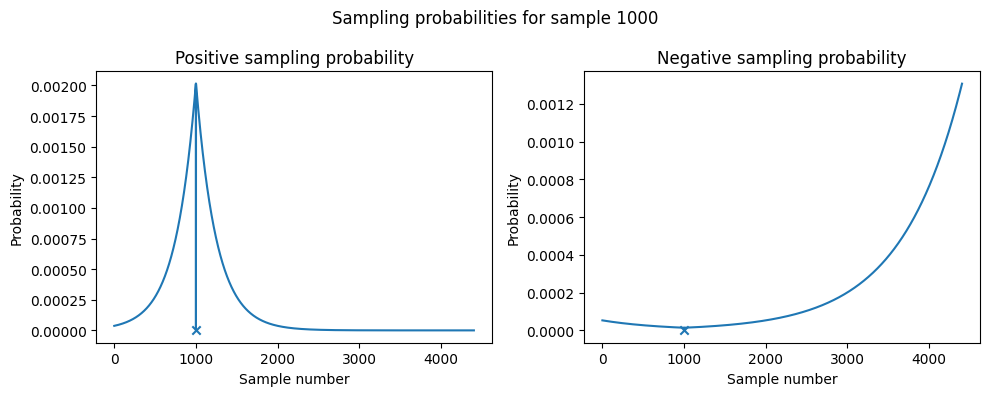

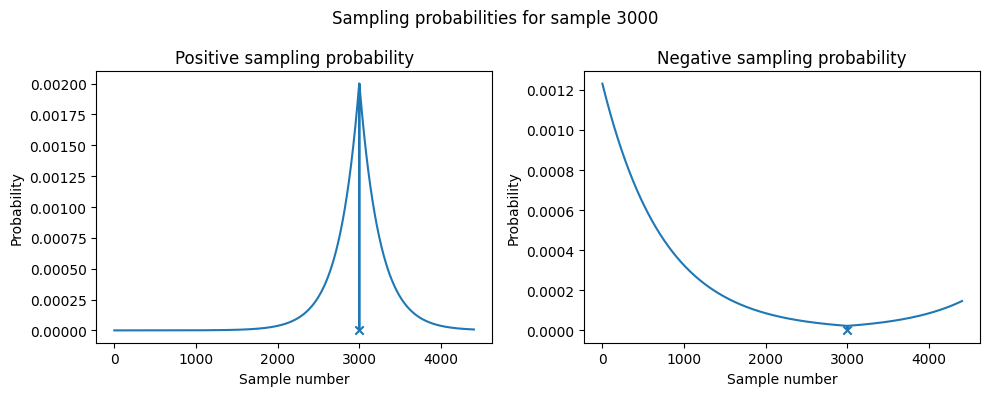

In [9]:
positive_proba, negative_proba = get_proba_per_sample(N=len(x_wpt), pos_t=250, neg_t=750)

for i in [10, 1000, 3000]:
    plt.figure(figsize=(10,4))
    plt.suptitle(f"Sampling probabilities for sample {i}")
    plt.subplot(1,2,1)
    plt.title("Positive sampling probability")
    plt.plot(positive_proba[i])
    plt.scatter(i, positive_proba[i][i], marker="x")
    plt.xlabel("Sample number")
    plt.ylabel("Probability")

    plt.subplot(1,2,2)
    plt.title("Negative sampling probability")
    plt.plot(negative_proba[i])
    plt.ylabel("Probability")
    plt.xlabel("Sample number")
    plt.scatter(i, negative_proba[i][i], marker="x")
    plt.tight_layout()

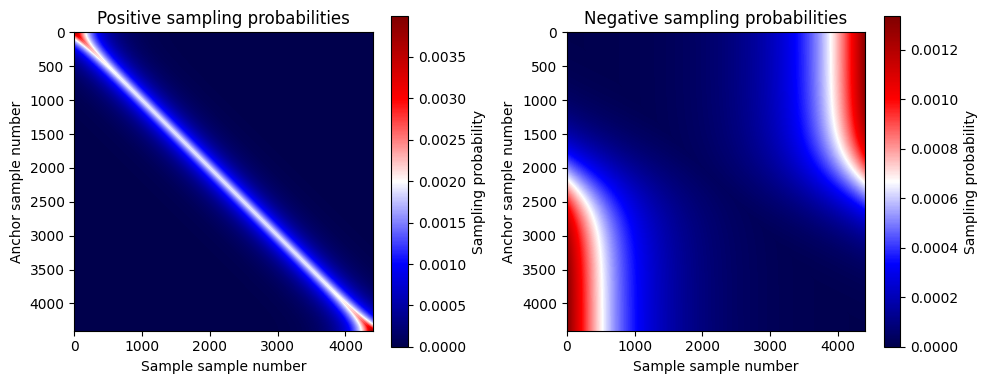

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Positive sampling probabilities")
plt.imshow(positive_proba, cmap="seismic")
plt.ylabel("Anchor sample number")
plt.xlabel("Sample sample number")
plt.colorbar(label="Sampling probability")

plt.subplot(1,2,2)
plt.title("Negative sampling probabilities")
plt.imshow(negative_proba, cmap="seismic")
plt.ylabel("Anchor sample number")
plt.xlabel("Sample sample number")
plt.colorbar(label="Sampling probability")

plt.tight_layout()

In [ ]:
fr = FeatureReducerScikit()
fr.fit(x_wpt, d=2, num_epochs=50)

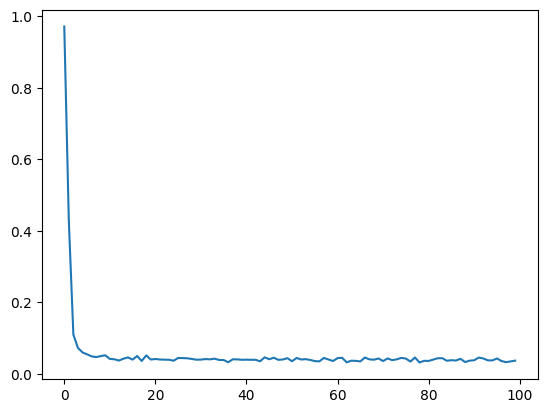

In [84]:
plt.plot(fr.loss_per_epoch)

In [85]:
y = fr.transform(x_wpt)

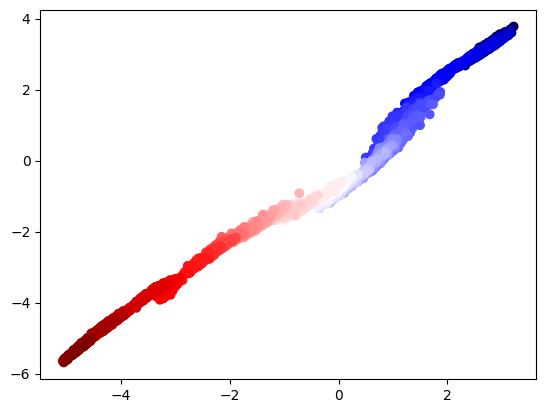

In [88]:
plt.scatter(y[:,0], y[:,1], c=time, cmap="seismic")

In [105]:
for cable in range(1,5):

    valid_date = datetime(2023, 1, 7, 10, 00)
    dataset_per_cable = get_samples_from_folder(PATH_TO_DATASET_2, valid_date)

    with open(f"{PATH_MODELS}/reducer_c{cable}.pkl", "wb") as h:
        pickle.dump(fr, h, protocol=pickle.HIGHEST_PROTOCOL)